In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
col_names = ['Refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'class']
data = pd.read_csv('glass.data', delimiter=',', index_col=0)
data.columns = col_names
data.head(5)

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
1,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Создадим графики распределения для каждого признака в датасете.

array([[<Axes: title={'center': 'Refractive_index'}>,
        <Axes: title={'center': 'Na'}>, <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

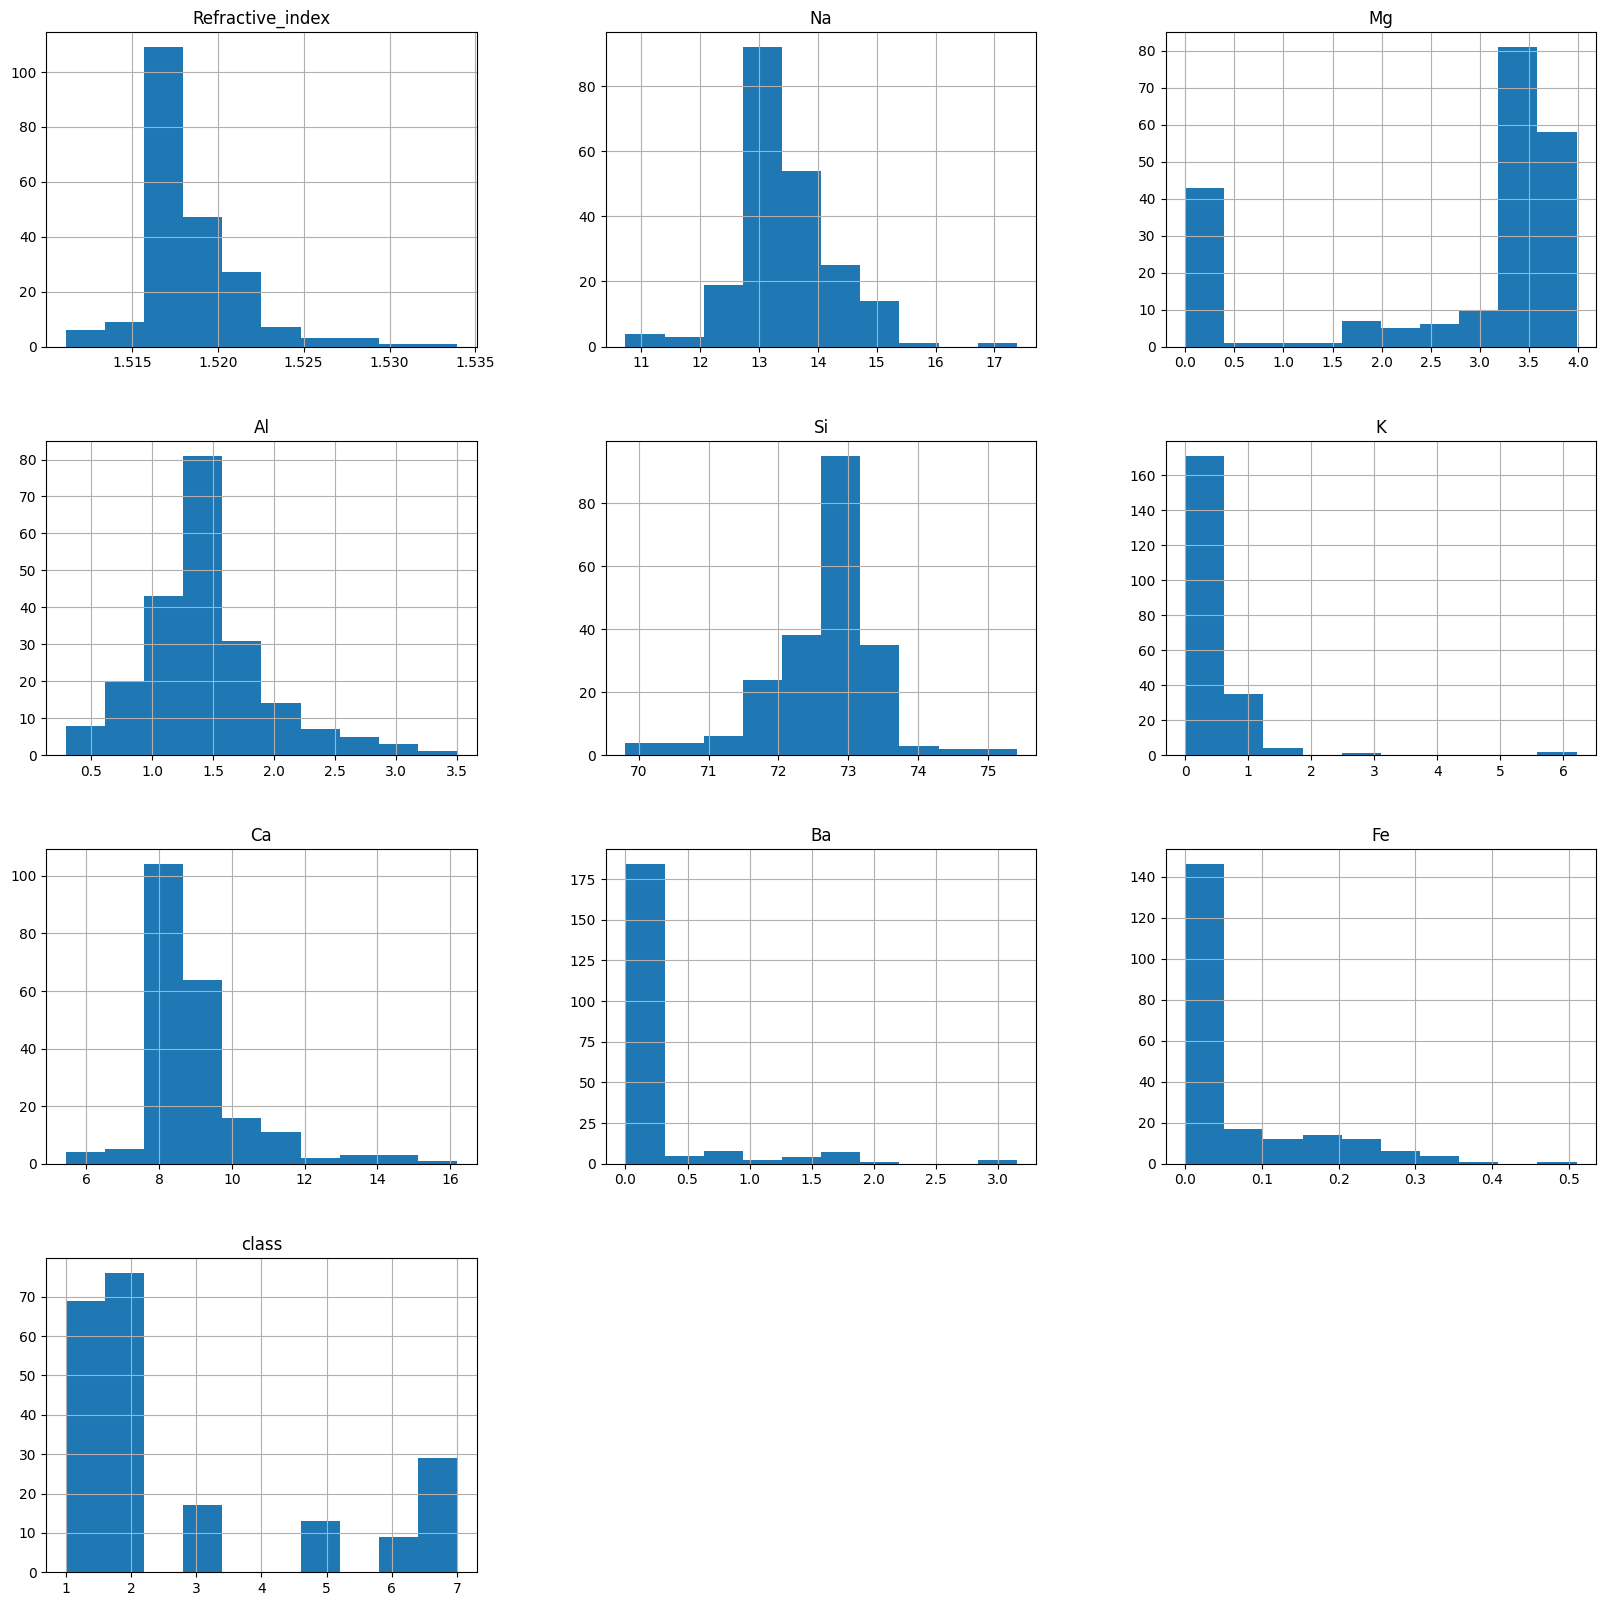

In [ ]:
data.hist(figsize=(20, 20))

Заметим, что в основном значения признаков имеют нормальное распределение, кроме признака Mg.

Изменим названия столбцов для улучшения читаемости графиков



In [ ]:
class_names = ['building_windows_float_processed', 'building_windows_non_float_processed', 'vehicle_windows_float_processed', 'vehicle_windows_non_float_processed', 'containers', 'tableware', 'headlamps']
data['class'] = data['class'].map(lambda x : class_names[x - 1])
data.head(5)

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
1,,,,,,,,,,
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_windows_float_processed
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_windows_float_processed
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_windows_float_processed
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_windows_float_processed
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float_processed


Построим график типа boxplot, который даст нам более наглядное представление о распределении значений в признаках.

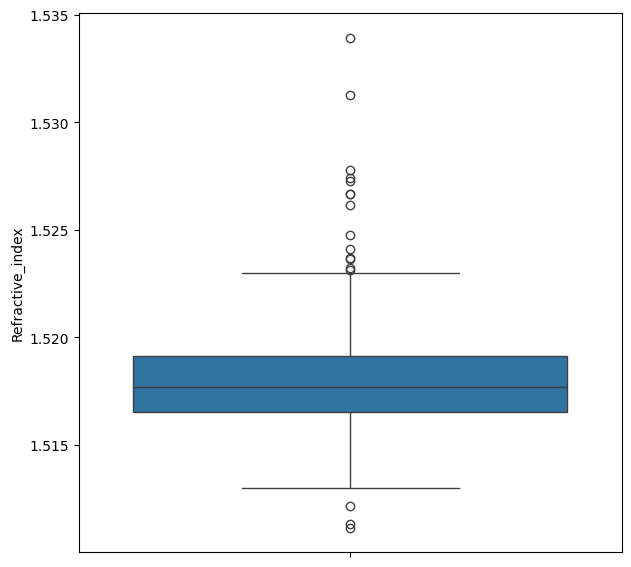

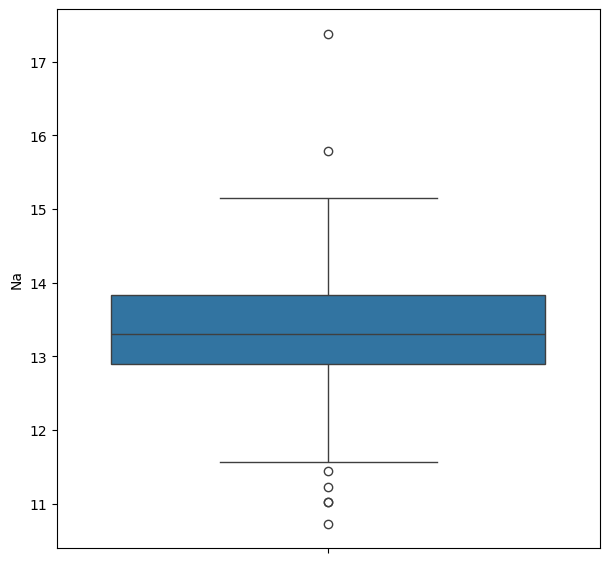

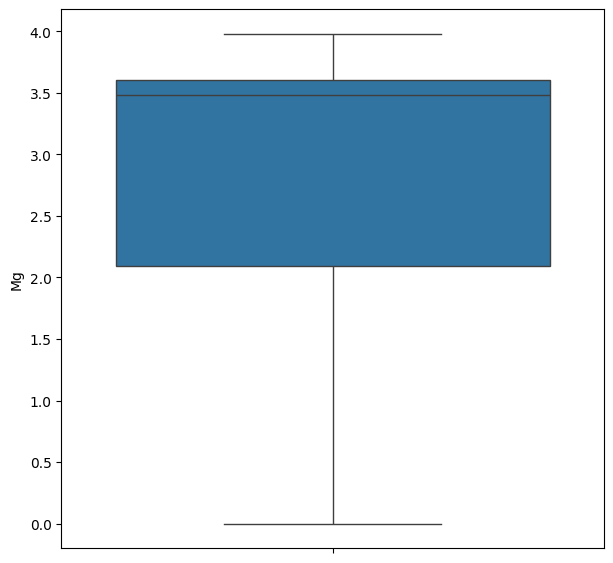

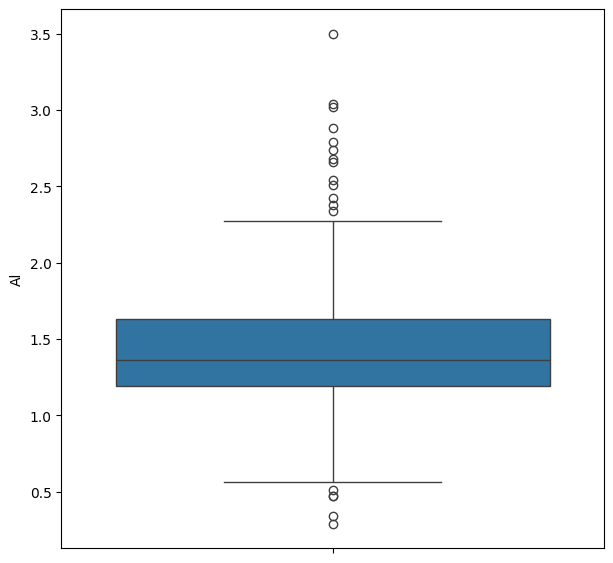

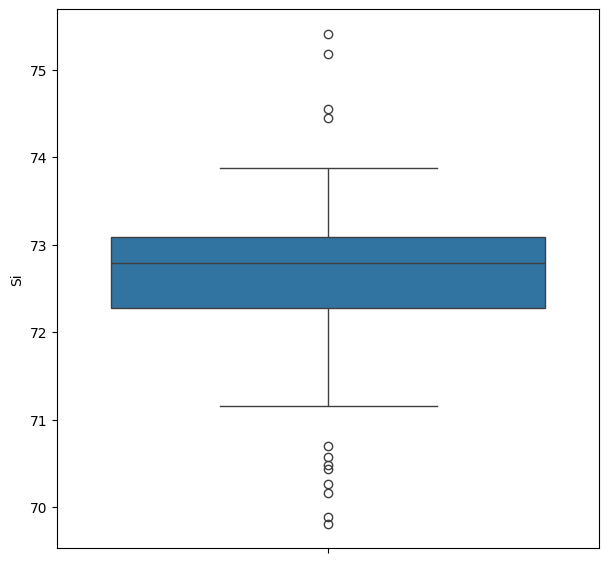

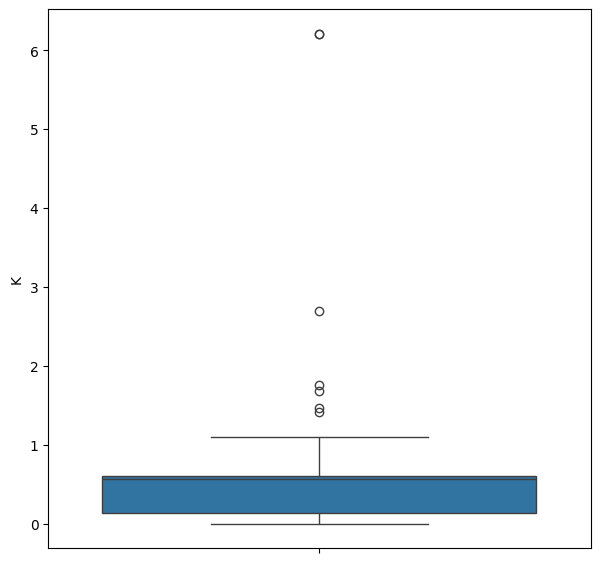

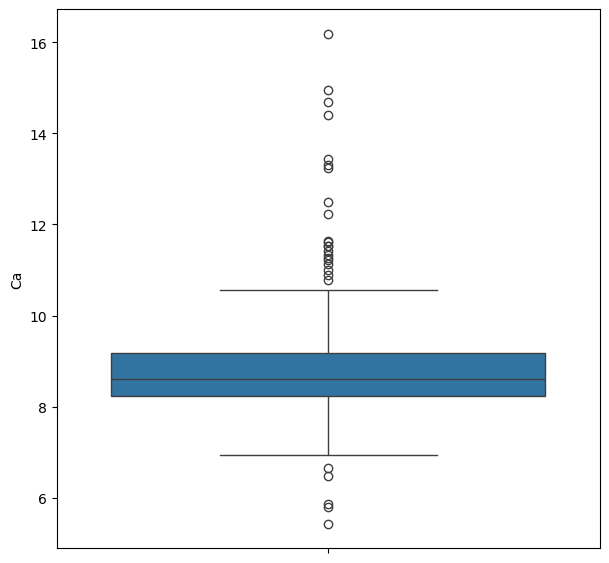

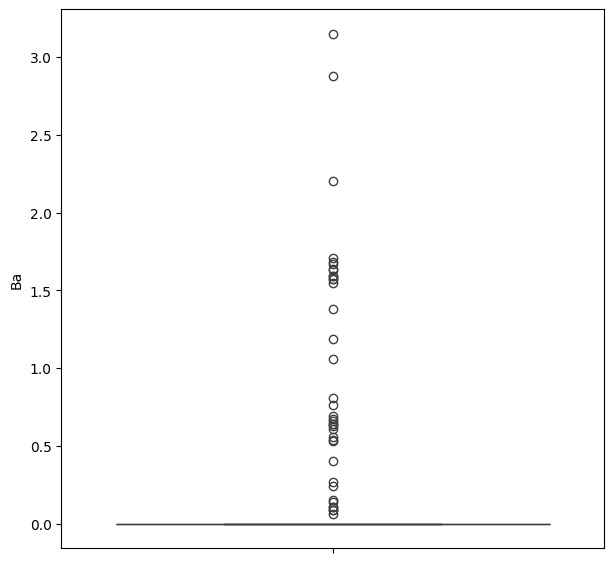

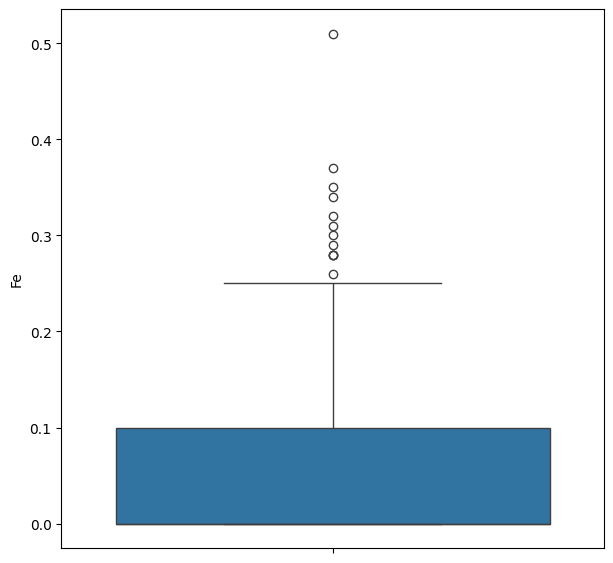

In [ ]:
feature_names = ['Refractive_index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in feature_names:
  fid, ax = plt.subplots(figsize=(7,7))
  sns.boxplot(data[i])

Построим парные графики для каждого признака в наборе данных.

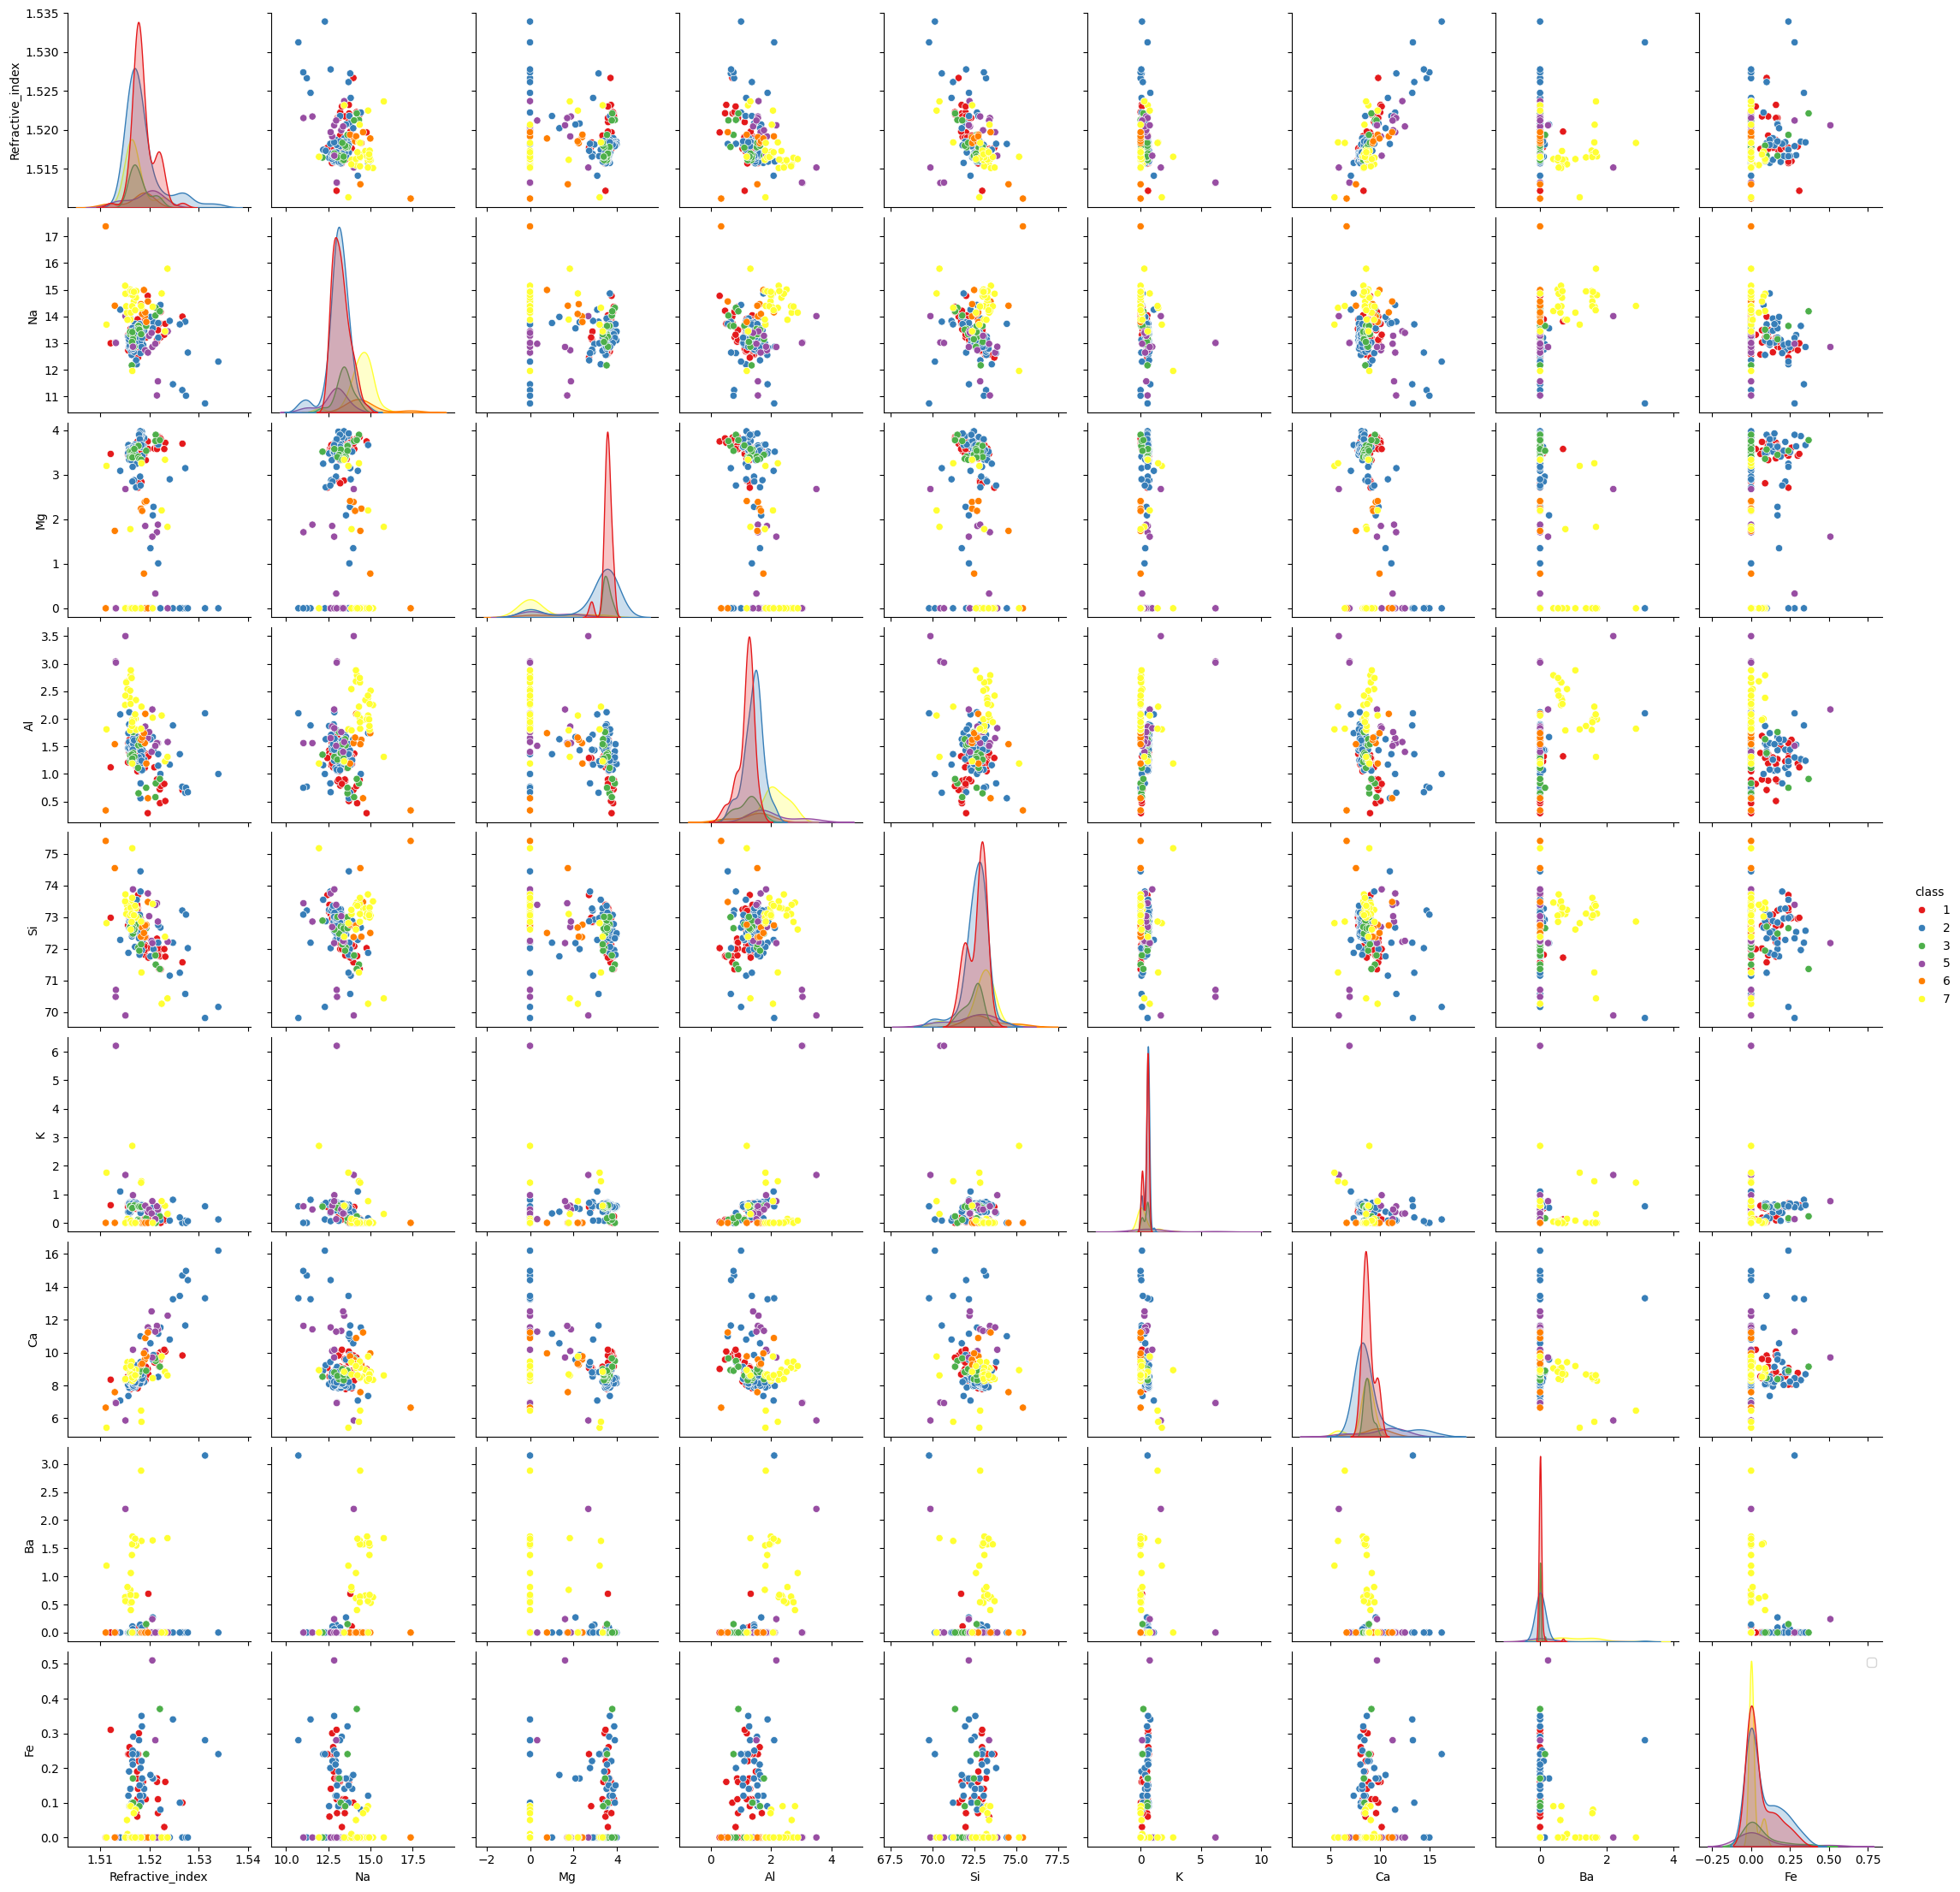

In [20]:
p_plot = sns.pairplot(data, hue="class", palette='Set1')
plt.legend()

Построенные графики позволяют нам легче судить о взаимосвязях признаков с принадлежностью к классу. Можно заметить, что два типа строительного стекла довольно слабо различаются по признакам. Также можно заметить, что стекло для фар (headlamps), часто имеет более высокое содержание оксида бария.

Найдем корреляцию между признаками. Корреляция отображает, насколько значения одних признаков зависит от значений других.

In [21]:
data.corr(numeric_only=True)

,Refractive_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
Refractive_index,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
class,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


Используя полученную таблицу корреляции признаков, построим более наглядное ее отображение в виде графика heatmap из библиотеки seaborn.

<Axes: >

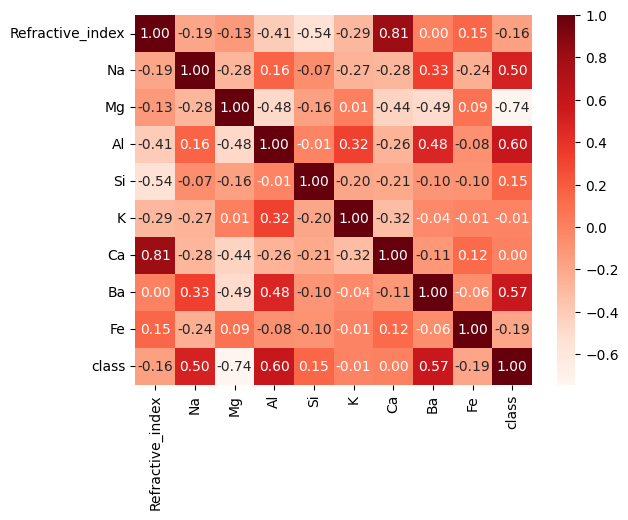

In [22]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.Reds, annot=True, fmt='.2f')

Обратим внимание, что процент содержания оксида кальция сильно коррелирует с коэффициентом отражения стекла (коэффициент корреляции 0.81). Далее, от одного из этих признаков можно избавиться, чтобы оптимизировать работу моделей.

Контрольные вопросы

# 1. Какие инструментальные средства используются для организации рабочего места специалиста Data Science?
К инструментальным средствам специалиста Data Science можно отнести:

Средства для программирования и анализа данных

К таким средствам можно отнести языки программирования и IDE. К наиболее популярным языкам для машинного обучения относятся Python и R. В качестве интегрированнных сред разработки для анализа данных чаще всего используется Jupiter Notebook или его аналоги за счет интерактивного доступа к данным и возможностям их визуализации.

Библиотеки и фреймворки

Для такой специфичной задачи как анализе данных стандартных возможностей языков программирования часто оказывается недостаточно. Поэтому еще одним важным инструментальным средством являются библиотеки и фреймворки, направленные на обработку данных (Pandas, Numpy), машинное обучение (scikit-learn, TensorFlow, PyTorch) и визуализацию данных (Matplotlib, Seaborn, Plotpy).

Инструменты для хранения и обработки данных

Для хранения и управления данными, использующимися в ходе обучения, необходимо использование баз данных (PostgreSql, MongoDB, Cassandra) или облачных хранилищ (AWS, Microsoft Azure, Apache Hadoop, Spark).

Средства управления проектами и контроля версий

Для организации процесса внедрения моделей в прикладные решения используются инструменты для контроля версий (GitHub/GitLab) и контейнеризаторы (Docker, Jenkins)

Средства для автоматизации и разверытвания моделей

После создания моделей, они нуждаются в развертывании на определенной платформе для их экспуатации и возможности контроля. К таким интрументам относятся MLFlow (отслеживание развертывания и управления экспериментами), KubeFlow (развертывание моделей в Kubernetes), AirFlow (автоматизации оркестрации процессов работы с данными).

# 2. Какие библиотеки Python используются для работы в области машинного обучения? Дайте характеристику каждой библиотеке.
Numpy - используется для работы с таблицами и многомерными данными, а также хорошо подходит для работы с большими объемами данных. Является основой для многих других библиотек и инструментов, используемых в машинном обучениии.
Matplotlib - пакет для визуализации данных, позволяет создавать графики и редактировать отдельные фигуры на нем.
TensorFlow - используется для создания, обучения и развертывания моделей машинного обучения и глубокого обучения. Эта библиотека является одной из самых популярных платформ для работы с нейронными сетями и сложными вычислительными задачами.
Pandas - библиотека, служащая для обработки и анализа данных. Позволяет производить очистку и моделирование данных без переключения на более специфичные для статообработки языки (такие как R и Octave). Также, библиоетка предоставляет широкие возможности для обмена данными между различными типами и переформатирование наборов данных.
PyTorch - библиотека для машинного обучения в Python. Специализируется на создании моделей глубокого обучения, в частности задачах компьютерного зрения, обработки естественного языка и генерации текста и изображений. Имеет открытый исходный код.
# 3. Почему при реализации систем машинного обучения наиболее широкое распространение получили библиотеки Python?
Библиотеки Python получили широкое распространение в сфере задач машинного обучения по рядку причин:

Простота и читабельность кода. Простая синтаксическая структура языка python позволяет специалистам Data Science сосредоточиться на решении задач машинного обучения, а не на синтаксических особенностях языка, что особенно важно в исследовательской среде
Большое количество библиотек и инструментов. Python имеет огромную экосистему специализированных библиотек для различных этапов для работы с данными и машинного обучения. Это позволяет разработчикам решать любые задачи без необходимости реализации новых инструментов.
Кроссплатформенность и простота интеграции. Python работает на различных платформах (Windows, Linux, macOS), что упрощает развертывание моделей машинного обучения на разных устройствах и в облачных системах. Также Python легко интегрируется с C++ и Java, что делает его хорошим выбором для гибридным систем, где требуется высокая производительность.
Широкая поддержка паралельных вычислений и работы с GPU. Python библиоетки поддерживают распределенные вычисления и использование графических процессоров, что имеет большое значение для ускорения сложных моделей глубокого обучения.
